Data is taken from Kaggle  
https://www.kaggle.com/c/dogs-vs-cats/data

In [1]:
import os
import numpy as np
import random
from PIL import Image
from matplotlib import pyplot as plt
import sys
from sklearn.model_selection import train_test_split

#folder with pictures
mypath="train\\"
#each class quantity
vol=500
image_size=(100,100)

files=os.listdir(mypath)
len(files)

25000

In [2]:
#separate cats and dogs
cat_files=[f for f in files if "cat" in f]
dog_files=[f for f in files if "dog" in f]

cats=random.sample(cat_files,vol)
dogs=random.sample(dog_files,vol)

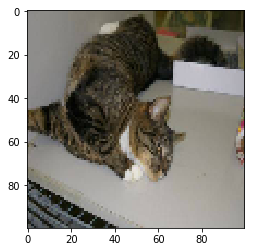

In [3]:
#Open image, resize and convert to numpy array
def load_image(image_path,image_size):
    image=Image.open(image_path)
    image=image.resize(image_size)
    image=np.array(image)
    return image

#check
i1=load_image(mypath+cats[5],image_size)
plt.imshow(i1)

In [4]:
dataset=[]
labels=[]

#Load all images to numpy array and create labels
for cat,dog in zip (cats,dogs):
    dataset.append(load_image(mypath+cat,image_size))
    labels.append(0)
    dataset.append(load_image(mypath+dog,image_size))
    labels.append(1)
    
#convert to numpy
dataset=np.array(dataset)
labels=np.array(labels)
print("dataset shape",dataset.shape)

print(sys.getsizeof(dataset)/(1024*1024))

dataset shape (1000, 100, 100, 3)
28.610366821289062


In [6]:
# split to train and test datasets, save to file
X_train,X_test,y_train,y_test=train_test_split(dataset,labels,test_size=0.1)
cat_dog_data=np.array([X_train,X_test,y_train,y_test])
np.save("cats_dogs.np",cat_dog_data)

0


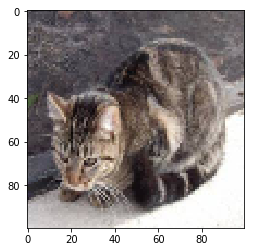

In [7]:
i=150
plt.imshow(dataset[i])
print(labels[i])